In [11]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore') 
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=FutureWarning)

In [12]:
# ---------------- Classics ------------ #
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------- Deep Learning libs --------- #
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

## MNIST Handwriting Image recognition aka Iris dataset

In [13]:
mnist = tf.keras.datasets.mnist # 28 x 28 images of hand-written digits 0-9

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

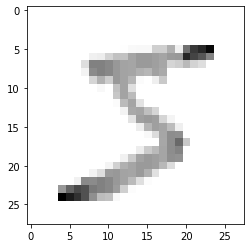

In [15]:
plt.imshow(X_train[0], cmap=plt.cm.binary);

In [16]:
model = Sequential()

# Pre-processing 28x28 image to 784 size
model.add(Flatten())
# Input -> Hidden
model.add(Dense(128, activation='relu'))
# 1st Hidden Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, verbose=True)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2617 - accuracy: 0.9227
Epoch 2/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1088 - accuracy: 0.9671
Epoch 3/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0730 - accuracy: 0.9768


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  100480    
_________________________________________________________________
dense_4 (Dense)              multiple                  16512     
_________________________________________________________________
dense_5 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [18]:
scores = model.evaluate(X_test, y_test, verbose=False)
for i, score in enumerate(scores):
    print(f"{model.metrics_names[i]}: {score*100}")

loss: 10.009835397284478
accuracy: 97.07000255584717


In [19]:
model.save('lame_mnist.model')

FailedPreconditionError: lame_mnist.model/variables; Not a directory

In [ ]:
new_model = tf.keras.models.load_model('lame_mnist.model')
predictions = new_model.predict(X_test)

In [ ]:
np.argmax(predictions[0])

In [ ]:
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()

## Cats and Dog

In [ ]:
# !rm -rf /storage/kagglecatsanddogs_3367a.zip
# !wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip -P /storage
# !unzip -qo /storage/kagglecatsanddogs_3367a.zip -d /storage
# !rm -rf /storage/kagglecatsanddogs_3367a.zip

In [ ]:
import os
import cv2

DATADIR = '/storage/PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        break
    break

In [ ]:
print(img_array.shape)

In [ ]:
IMG_SIZE = 50

new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_img_array, cmap = 'gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_img_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [10]:
print(len(training_data))

NameError: name 'training_data' is not defined

In [ ]:
import random
random.seed(42)
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

In [ ]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
X.shape, y.shape

In [ ]:
import pickle

pickle_out = open("/storage/PetImages/X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/storage/PetImages/y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# pickle_in = open("/storage/PetImages/X.pickle", "rb")
# X_pkl = pickle.load(pickle_in)
# pickle_in.close()

# pickle_in = open("/storage/PetImages/y.pickle", "rb")
# y_pkl = pickle.load(pickle_in)
# pickle_in.close()

# X_pkl.shape, y_pkl.shape

In [ ]:
# Normalize it

X = X / 255
X[0]

In [ ]:
X.shape, y.shape

In [ ]:
# Create CNN Model

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattens 3D feature to 1D features
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", 
             optimizer="adam",
             metrics=['accuracy'])

history = model.fit(X, y, batch_size=32, epochs=30, validation_split=0.1)

In [ ]:
history.history

In [ ]:
# Plot model loss
plt.figure(figsize=(10,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show();

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) # Flattens 3D feature to 1D features
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss="binary_crossentropy", 
             optimizer="adam",
             metrics=['accuracy'])

history = model.fit(X, y, batch_size=32, epochs=30, validation_split=0.3)

In [ ]:
# Plot model loss
plt.figure(figsize=(10,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show();